<a href="https://colab.research.google.com/github/jhbeann/fast_deep/blob/main/2_2Heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Mount Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
!ls -al '/gdrive/My Drive/data'

total 2171732
-rw------- 1 root root    337847 Oct 21 05:44 data_202001.csv
-rw------- 1 root root    314682 Oct 13 10:05 data_202002.csv
-rw------- 1 root root    335953 Oct 13 10:05 data_202003.csv
-rw------- 1 root root    988308 Oct 21 06:07 data_2020.csv
-rw------- 1 root root 783889122 Oct 20 09:02 TCS_영업소간통행시간_1시간_1개월_202001
-rw------- 1 root root 699429059 Oct 20 10:56 TCS_영업소간통행시간_1시간_1개월_202002
-rw------- 1 root root 738556069 Oct 20 10:55 TCS_영업소간통행시간_1시간_1개월_202003


# 2. Korean Characters

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

런타임 다시 시작

In [4]:
# import pyplot as a alias 'plt'
import matplotlib.pyplot as plt
# import seaborn as a alias 'sns'
import seaborn as sns
plt.rc('font', family = 'NanumBarunGothic')

# 3. Load data

In [5]:
import pandas as pd
#load a file under "data" folder
file ="/gdrive/My Drive/data/data_2020.csv"
data = pd.read_csv(file)

In [6]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37356 entries, 0 to 37355
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   집계일자     37356 non-null  int64
 1   집계시      37356 non-null  int64
 2   출발영업소코드  37356 non-null  int64
 3   도착영업소코드  37356 non-null  int64
 4   통행시간     37356 non-null  int64
 5   요일       37356 non-null  int64
dtypes: int64(6)
memory usage: 1.7 MB


# 4. 집계일자

In [8]:
data_06_22 = data[data['집계시'].isin(range(6,23))]

In [9]:
data_06_22.sort_values(by='집계시')

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
25164,20200302,6,101,110,2772,0
22064,20200213,6,101,130,8044,3
12199,20200130,6,101,115,6542,3
6518,20200117,6,101,105,806,4
28006,20200309,6,101,115,7670,0
...,...,...,...,...,...,...
15006,20200207,22,101,105,991,4
16139,20200209,22,101,130,9075,6
28346,20200310,22,101,115,4747,1
16141,20200209,22,101,130,7947,6


In [38]:
data_06_22_day = data_06_22.groupby('집계일자')['도착영업소코드'].value_counts()
data_06_22_day

집계일자      도착영업소코드
20200101  105        96
          110        65
          115        51
          135        19
          140        19
                     ..
20200331  140        16
          135        15
          120        14
          130        13
          125         9
Name: 도착영업소코드, Length: 727, dtype: int64

In [40]:
data_06_22_day = data_06_22.groupby('집계일자')['도착영업소코드'].value_counts().unstack(level=0)
data_06_22_day

집계일자,20200101,20200102,20200103,20200104,20200105,20200106,20200107,20200108,20200109,20200110,...,20200322,20200323,20200324,20200325,20200326,20200327,20200328,20200329,20200330,20200331
도착영업소코드,,,,,,,,,,,,,,,,,,,,,
105,96.0,102.0,98.0,90.0,77.0,96.0,94.0,102.0,102.0,96.0,...,87.0,102.0,102.0,102.0,102.0,100.0,96.0,93.0,102.0,100.0
110,65.0,93.0,85.0,76.0,60.0,81.0,86.0,86.0,92.0,82.0,...,50.0,86.0,89.0,82.0,81.0,83.0,68.0,68.0,91.0,94.0
115,51.0,52.0,64.0,52.0,49.0,56.0,53.0,53.0,63.0,52.0,...,50.0,62.0,53.0,52.0,53.0,51.0,52.0,50.0,56.0,56.0
120,15.0,15.0,16.0,15.0,14.0,12.0,10.0,15.0,14.0,17.0,...,17.0,16.0,17.0,16.0,13.0,13.0,18.0,17.0,14.0,14.0
125,17.0,15.0,15.0,14.0,26.0,14.0,16.0,18.0,17.0,15.0,...,10.0,17.0,10.0,16.0,16.0,18.0,10.0,16.0,17.0,9.0
130,18.0,18.0,23.0,15.0,22.0,25.0,17.0,18.0,20.0,28.0,...,17.0,20.0,17.0,14.0,15.0,14.0,21.0,21.0,21.0,13.0
135,19.0,22.0,17.0,25.0,14.0,18.0,16.0,15.0,19.0,17.0,...,15.0,15.0,12.0,17.0,15.0,15.0,17.0,16.0,12.0,15.0
140,19.0,15.0,26.0,17.0,18.0,18.0,17.0,20.0,18.0,18.0,...,12.0,18.0,18.0,18.0,19.0,16.0,17.0,17.0,18.0,16.0


In [41]:
data_06_22_day = data_06_22.groupby('집계일자')['도착영업소코드'].value_counts().unstack()
data_06_22_day

도착영업소코드,105,110,115,120,125,130,135,140
집계일자,,,,,,,,
20200101,96.0,65.0,51.0,15.0,17.0,18.0,19.0,19.0
20200102,102.0,93.0,52.0,15.0,15.0,18.0,22.0,15.0
20200103,98.0,85.0,64.0,16.0,15.0,23.0,17.0,26.0
20200104,90.0,76.0,52.0,15.0,14.0,15.0,25.0,17.0
20200105,77.0,60.0,49.0,14.0,26.0,22.0,14.0,18.0
...,...,...,...,...,...,...,...,...
20200327,100.0,83.0,51.0,13.0,18.0,14.0,15.0,16.0
20200328,96.0,68.0,52.0,18.0,10.0,21.0,17.0,17.0
20200329,93.0,68.0,50.0,17.0,16.0,21.0,16.0,17.0


<Axes: xlabel='도착영업소코드', ylabel='집계일자'>

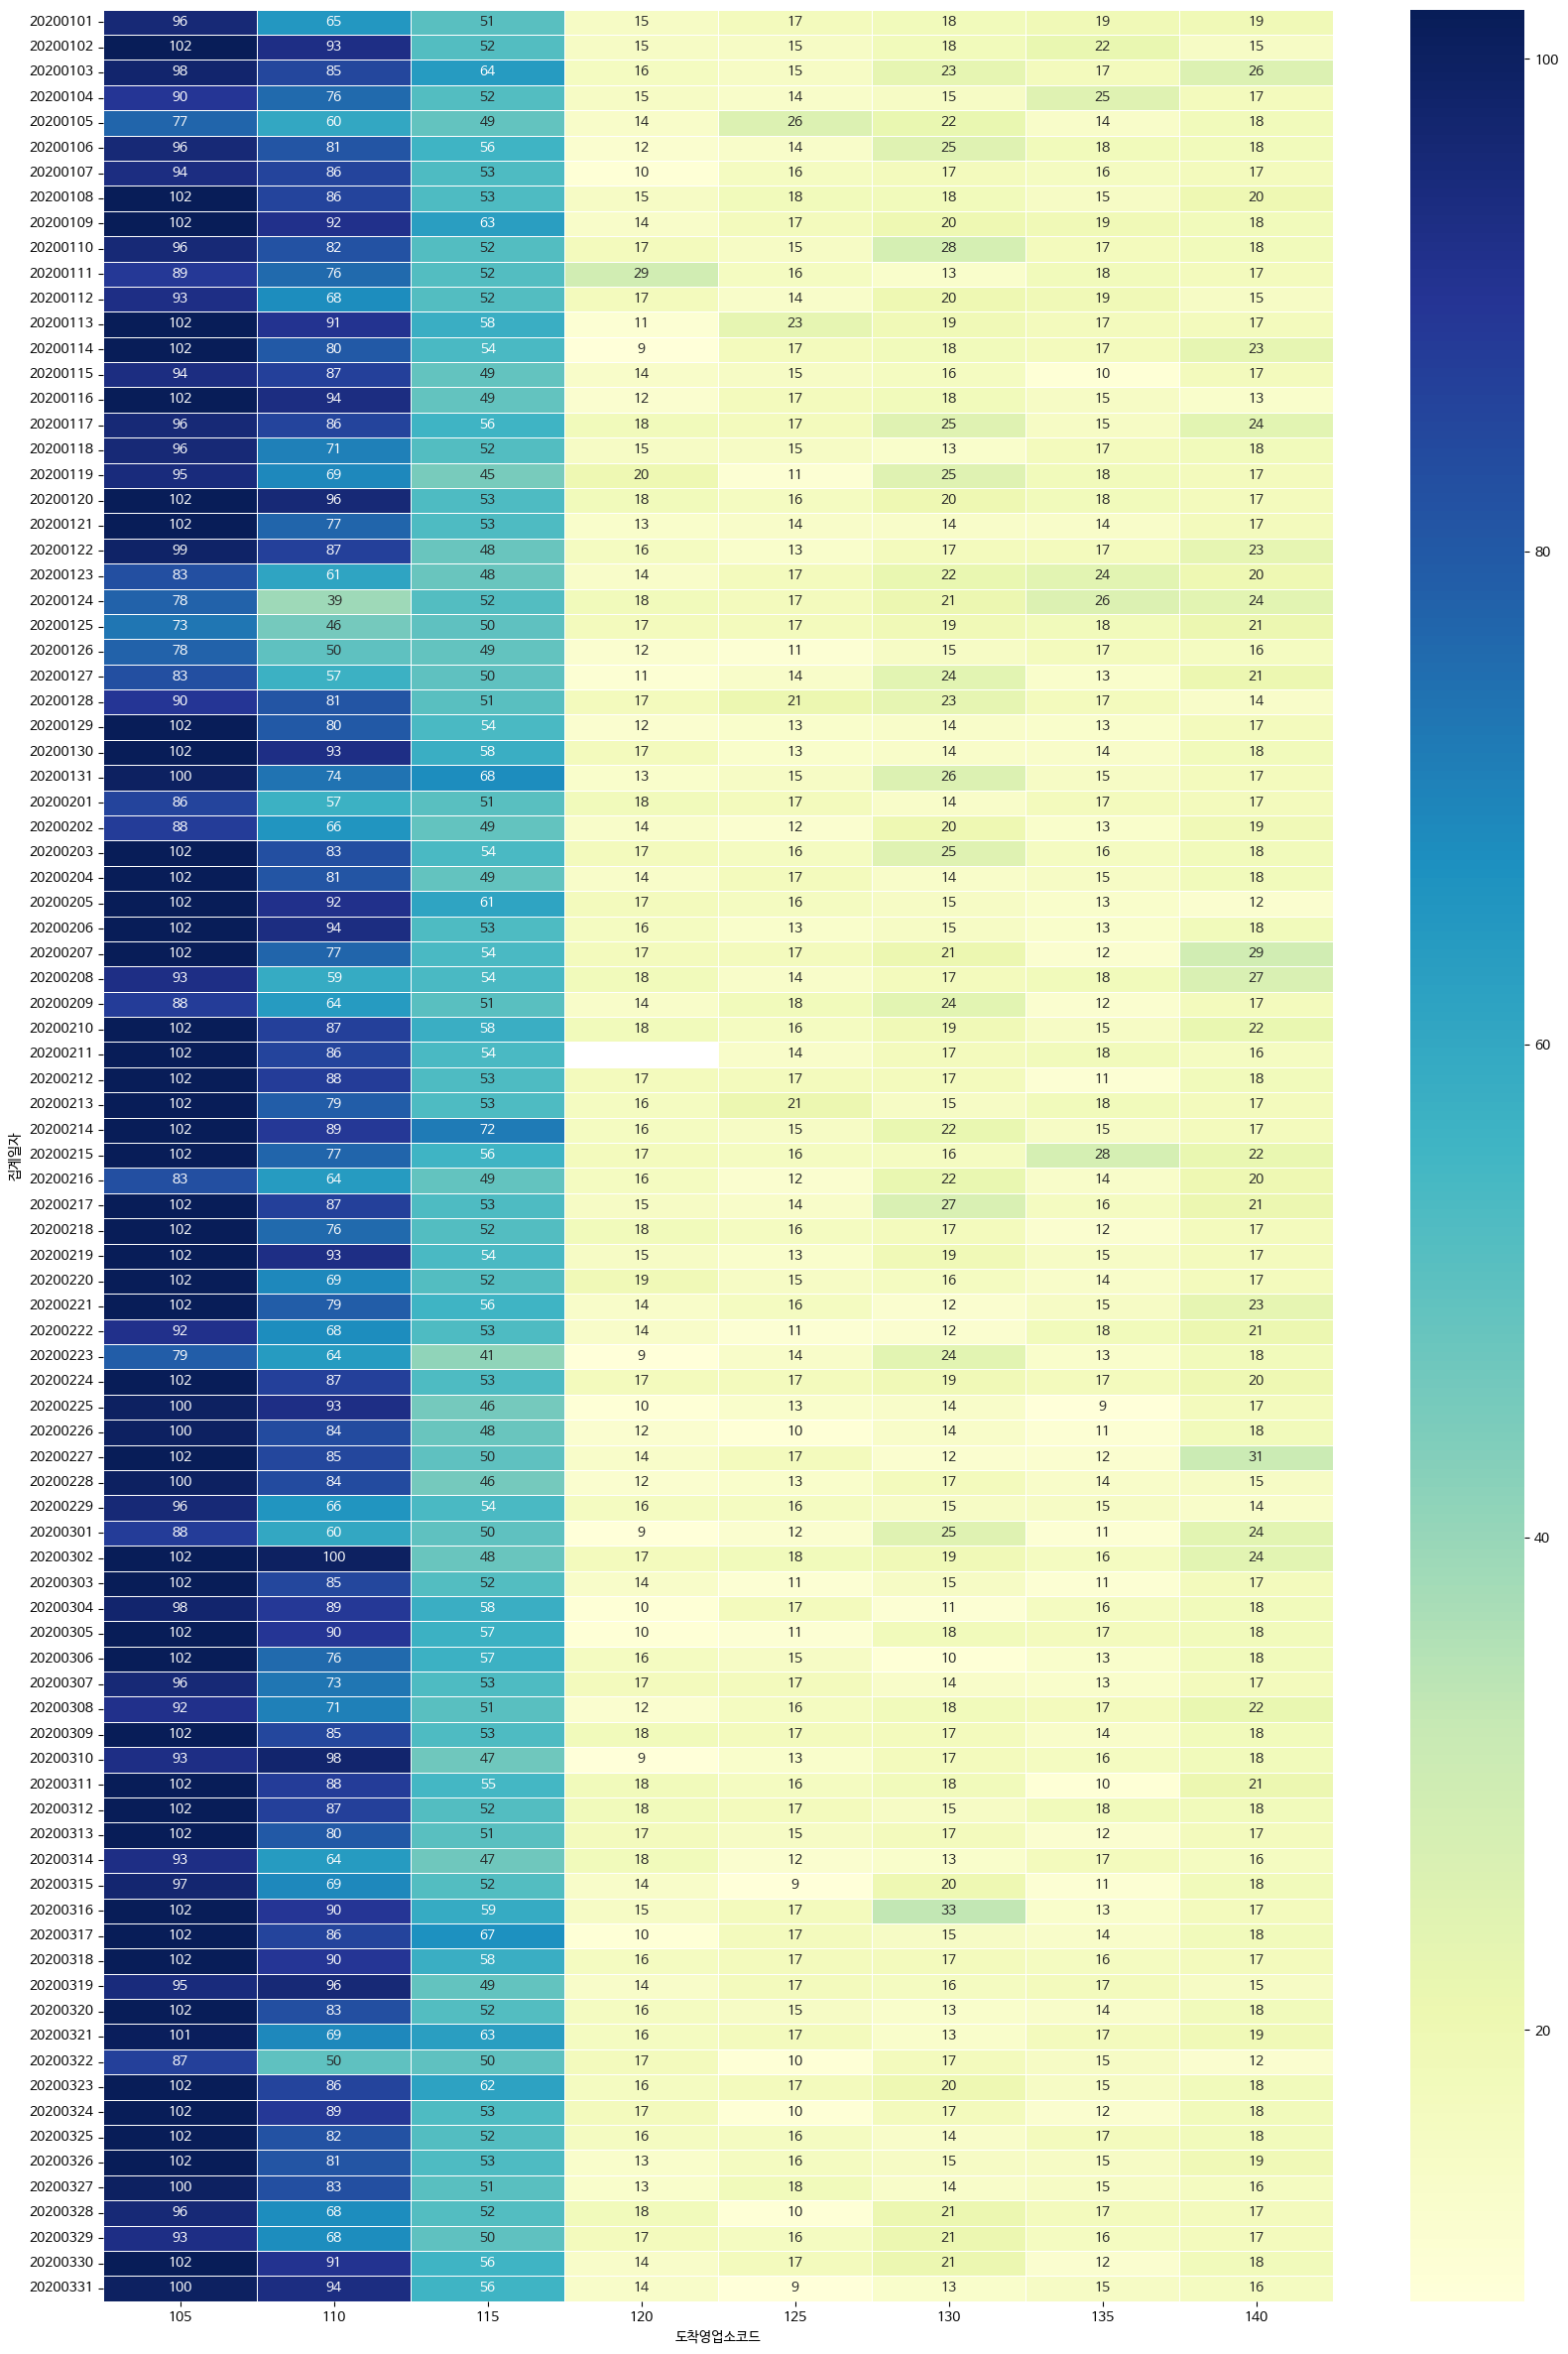

In [42]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize =(20,30))
sns.heatmap(data_06_22_day, annot = True, fmt =".0f", linewidths =.5, ax=ax, cmap = "YlGnBu")

# 5. 집계시

In [43]:
data_06_22_time = data_06_22.groupby('집계시')['도착영업소코드'].value_counts().unstack().fillna(0)
data_06_22_time

도착영업소코드,105,110,115,120,125,130,135,140
집계시,,,,,,,,
6,532,403,250,42,42,46,45,80
7,532,443,306,65,56,55,46,82
8,532,474,284,78,65,82,60,87
9,528,466,283,91,77,94,75,89
10,529,458,292,94,79,99,81,93
11,529,460,289,93,85,108,86,94
12,526,460,292,94,87,108,91,100
13,525,448,288,96,93,113,91,100
14,523,454,290,96,95,113,94,101


<Axes: xlabel='도착영업소코드', ylabel='집계시'>

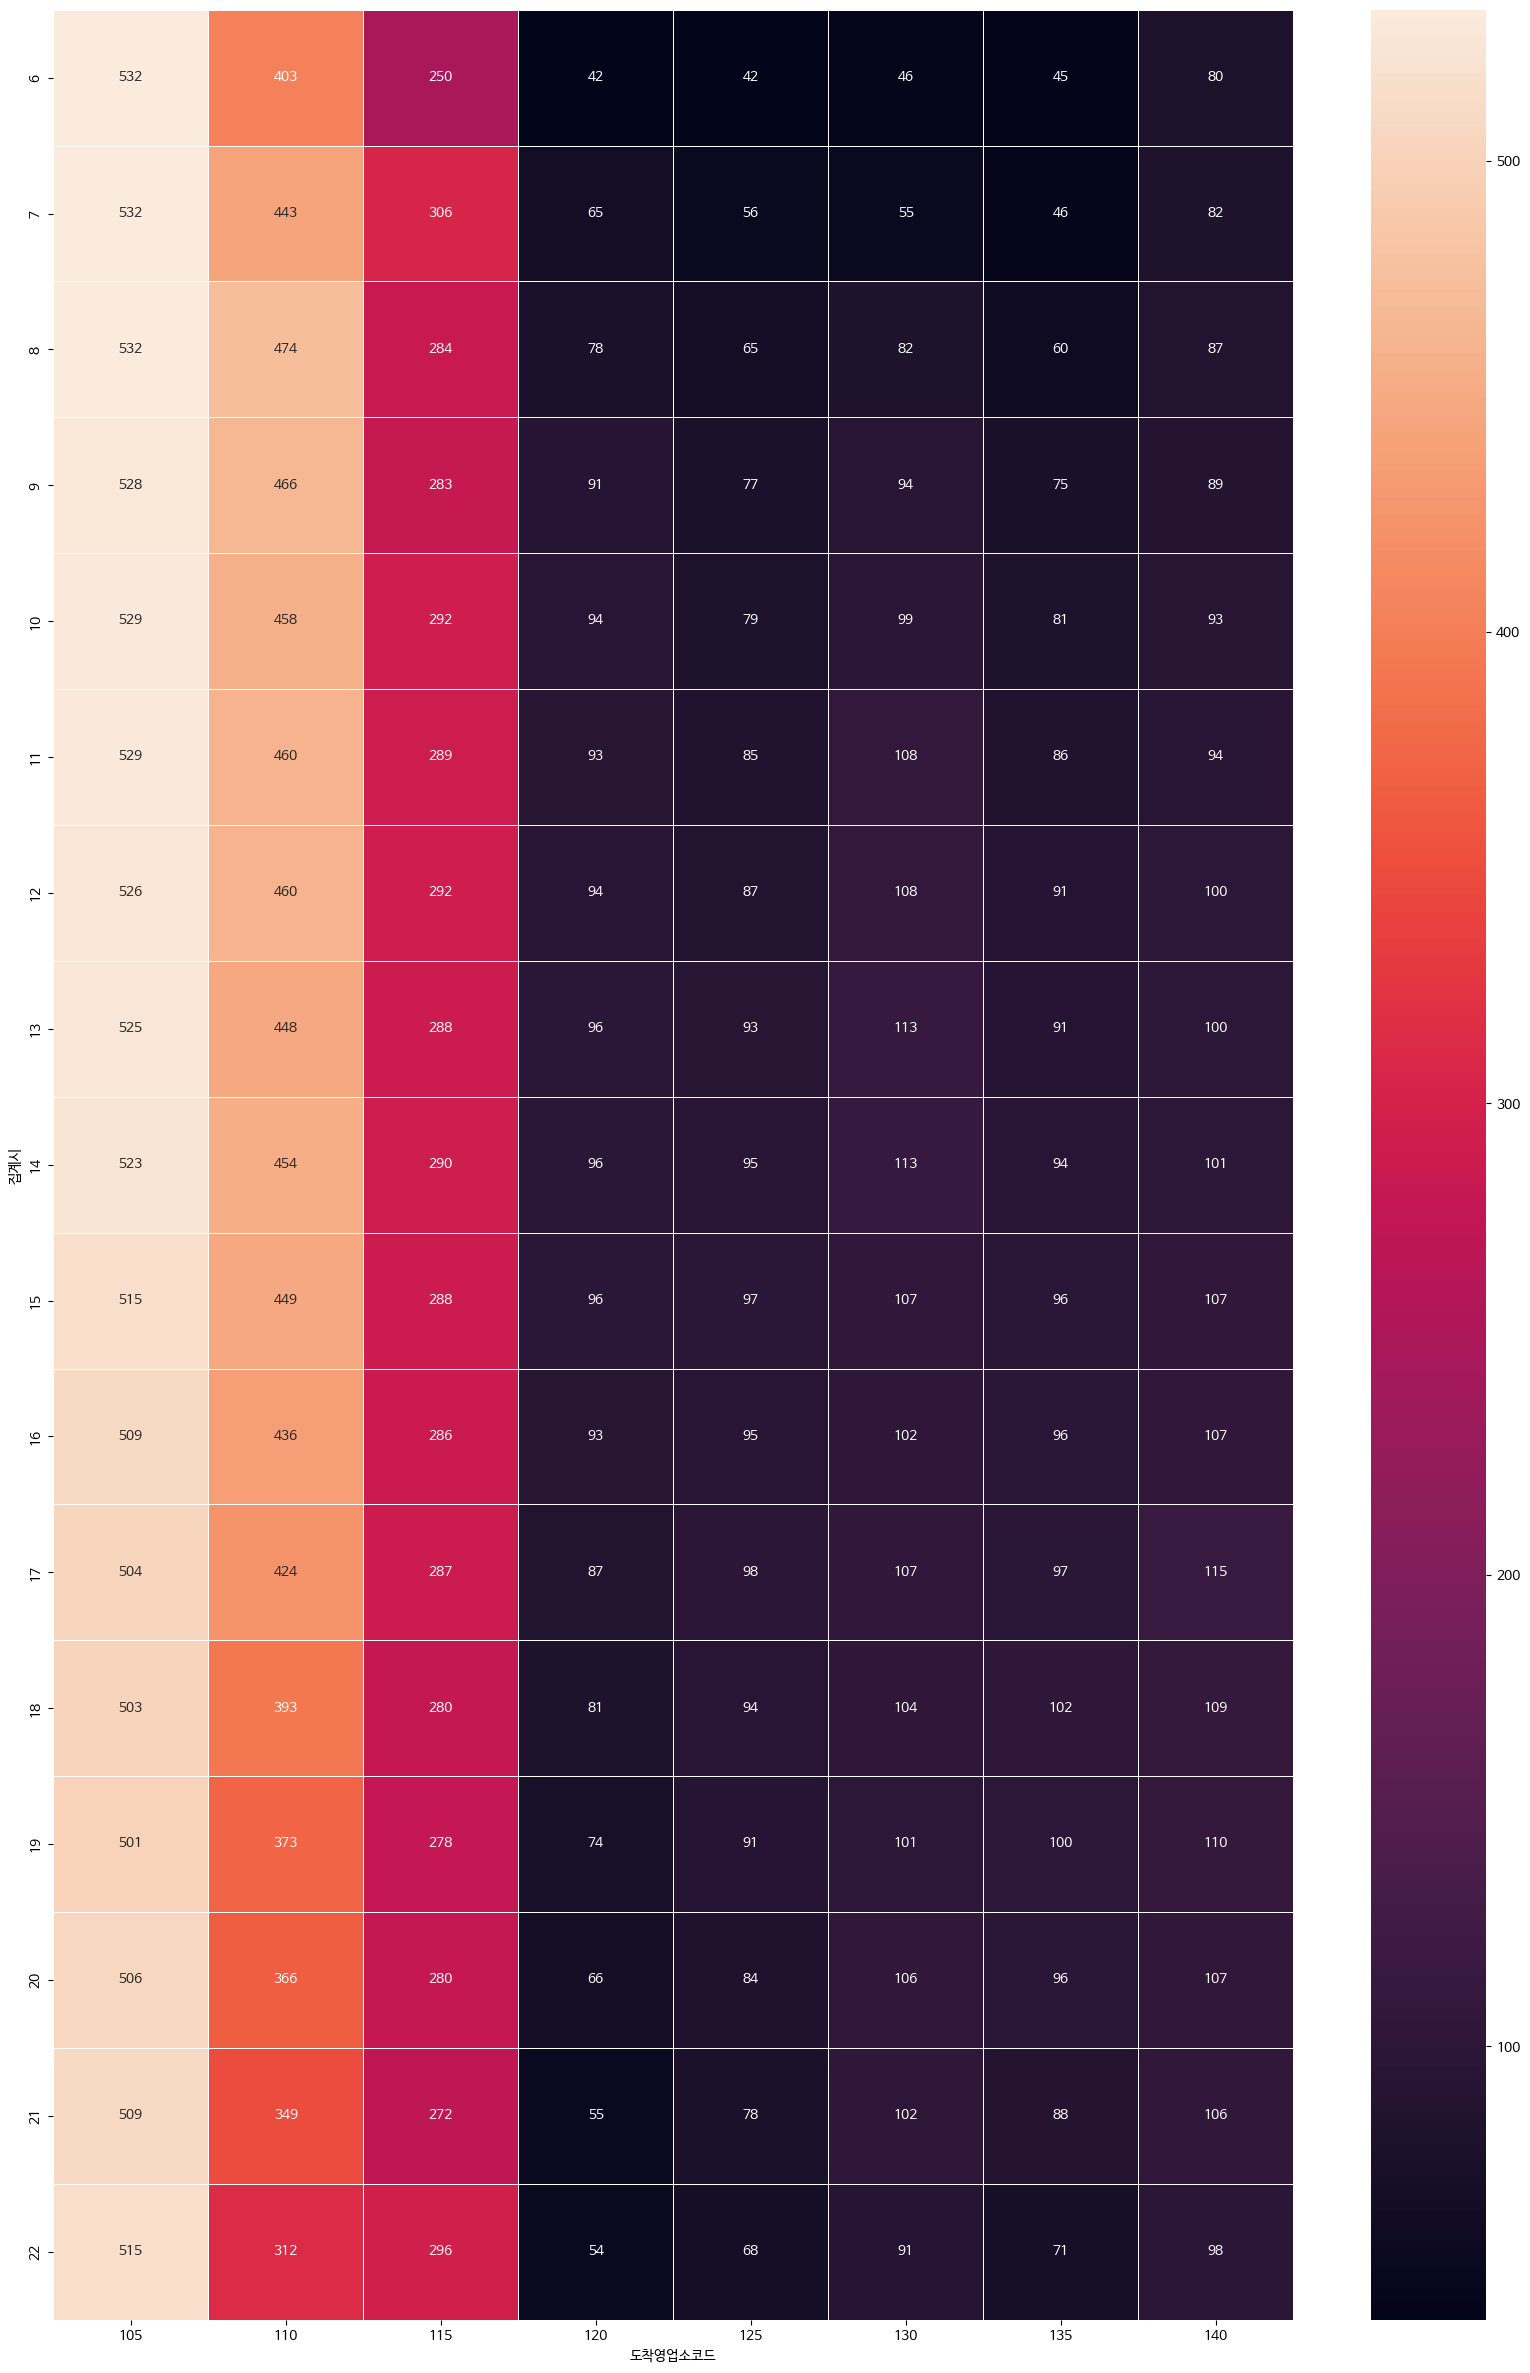

In [44]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize =(20,30))     # fmt=d : 정수값
sns.heatmap(data_06_22_time, annot = True, fmt ="d", linewidths =.5, ax=ax)

# 6. 요일

In [45]:
data_06_22_weekdays = data_06_22.groupby('요일')['도착영업소코드'].value_counts().unstack().fillna(0)
data_06_22_weekdays

도착영업소코드,105,110,115,120,125,130,135,140
요일,,,,,,,,
0,1301,1121,713,199,216,288,200,249
1,1293,1112,687,155,188,211,186,226
2,1303,1111,694,193,198,208,183,235
3,1300,1114,689,192,206,214,218,237
4,1280,1017,731,203,203,249,200,262
5,1203,870,689,228,192,195,238,243
6,1138,823,638,185,181,273,190,233


<Axes: xlabel='도착영업소코드', ylabel='요일'>

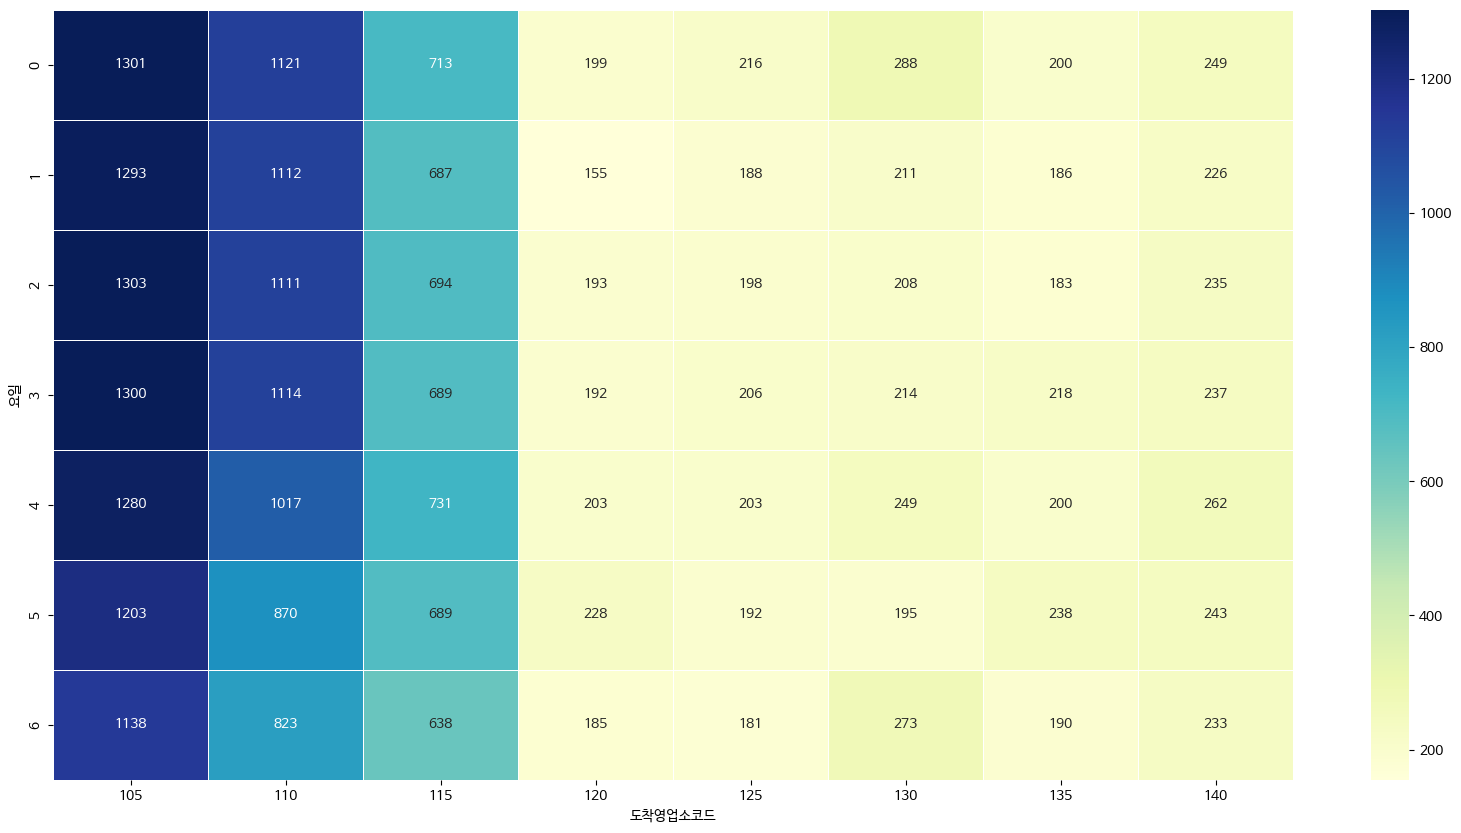

In [46]:
# draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data_06_22_weekdays, annot = True, fmt="d", linewidths=.5, ax=ax, cmap = "YlGnBu")